<a href="https://colab.research.google.com/github/princeamitlali/DSA/blob/master/hackathon_hack2future.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("this is the start of the coading")

this is the start of the coading


importing important packages and data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('CO2_Emissions_Canada.csv')
#schema = pd.read_csv('survey_results_schema.csv')
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


getting info about DATA

In [ ]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1]  #Provide the number of columns in the dataset
print(num_rows,num_cols)

7385 12


set the output box size to view all datas



In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
print(df.dtypes)

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object


data engineering filtering null values

In [ ]:
no_nulls = set(df.columns[df.isnull().mean()==0])   #columns having zero null value
no_nulls

{'CO2 Emissions(g/km)',
 'Cylinders',
 'Engine Size(L)',
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Comb (L/100 km)',
 'Fuel Consumption Comb (mpg)',
 'Fuel Consumption Hwy (L/100 km)',
 'Fuel Type',
 'Make',
 'Model',
 'Transmission',
 'Vehicle Class'}

some graphs to see the relation

In [ ]:
def Plot_Graph(column_name,Title):
    '''
    INPUT - TITLE - string - title of the plot
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            plot-bar- bar plot of the column
    '''
    status_vals = df[column_name].value_counts()
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(5)

    (status_vals/df.shape[0]).plot(kind="bar");
    plt.title(Title);
    # plt.set_figwidth(4)
    # plt.set_figheight(1)
    plt.show();

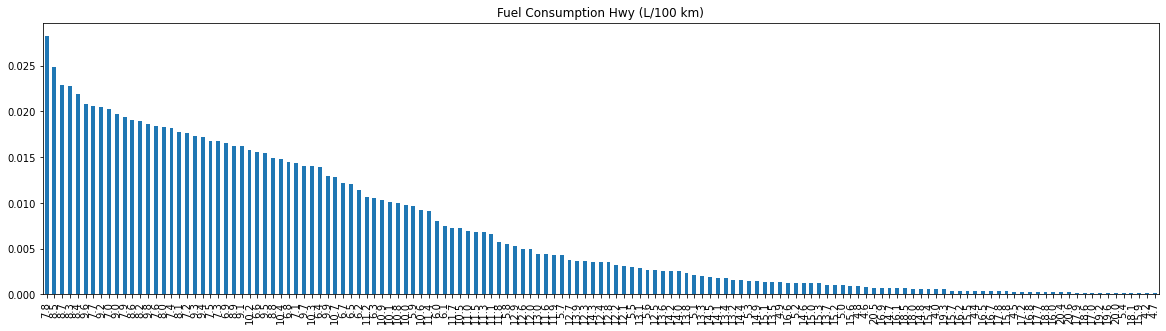

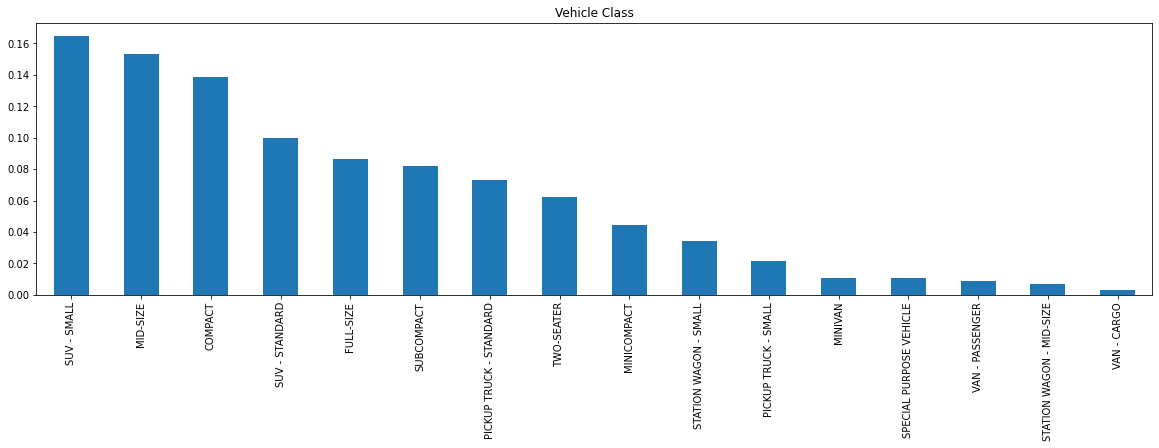

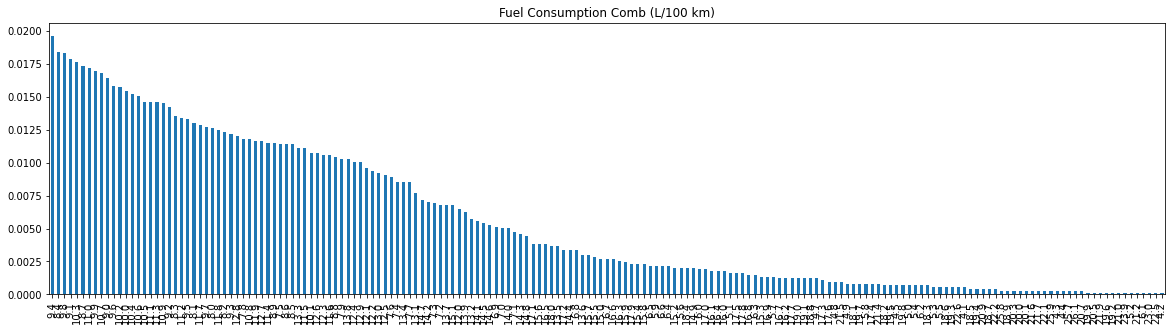

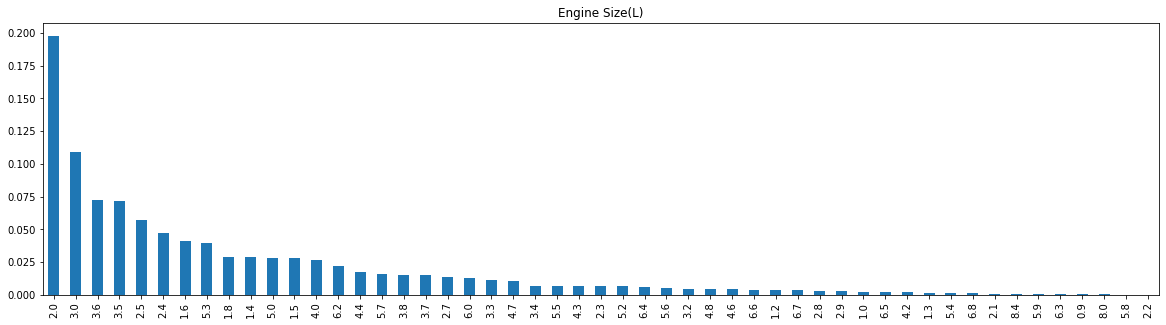

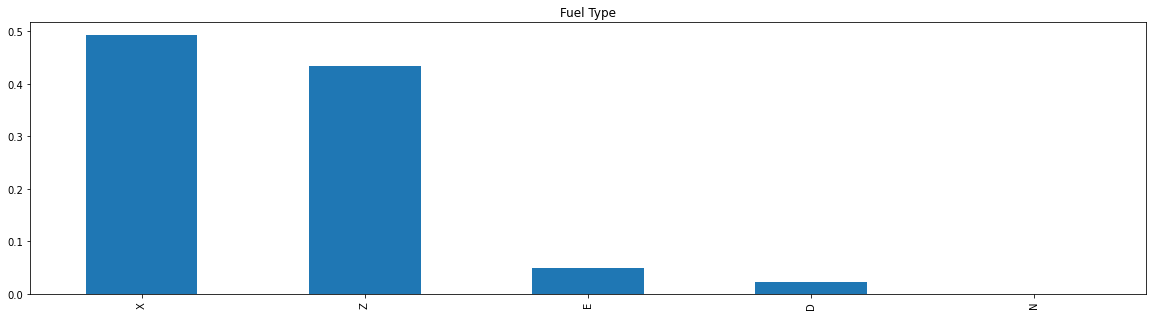

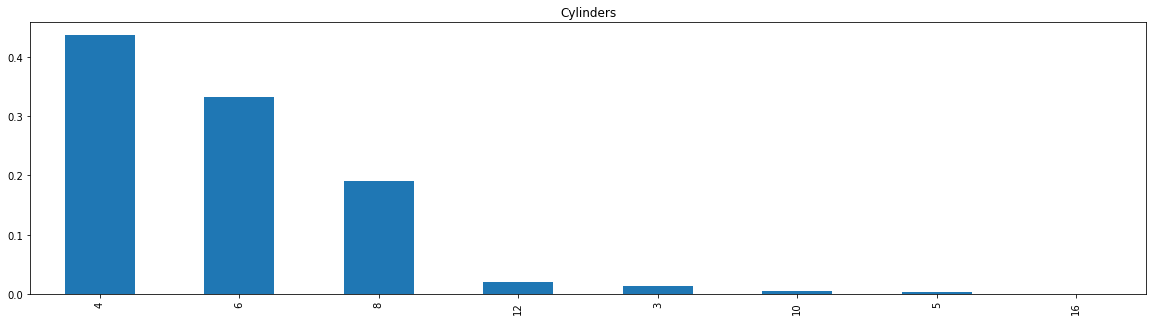

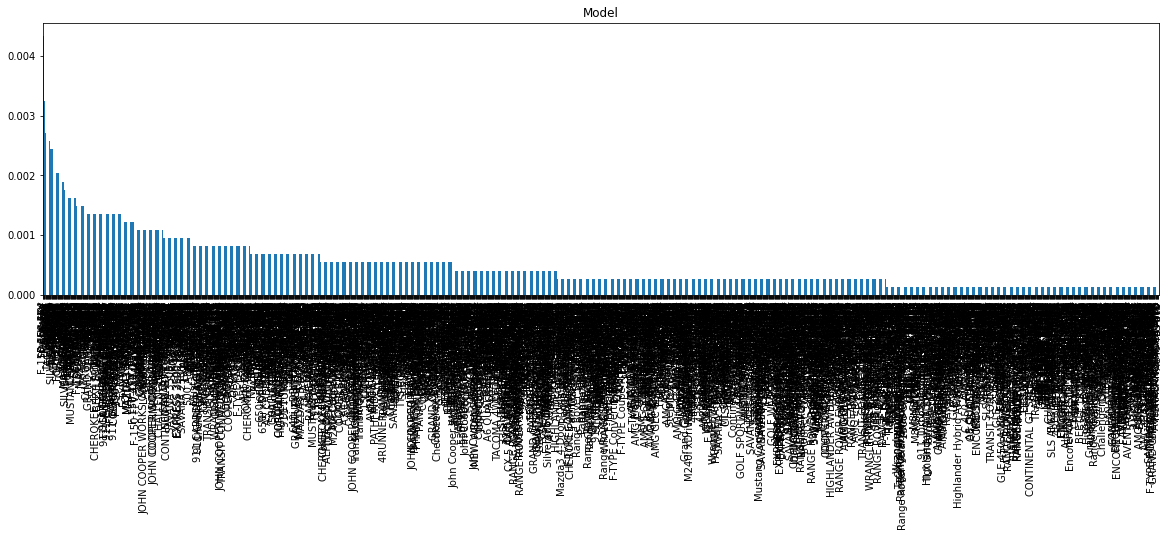

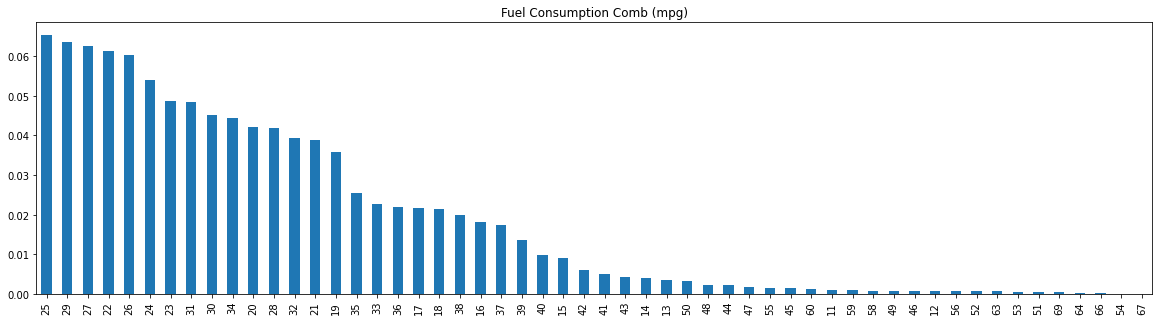

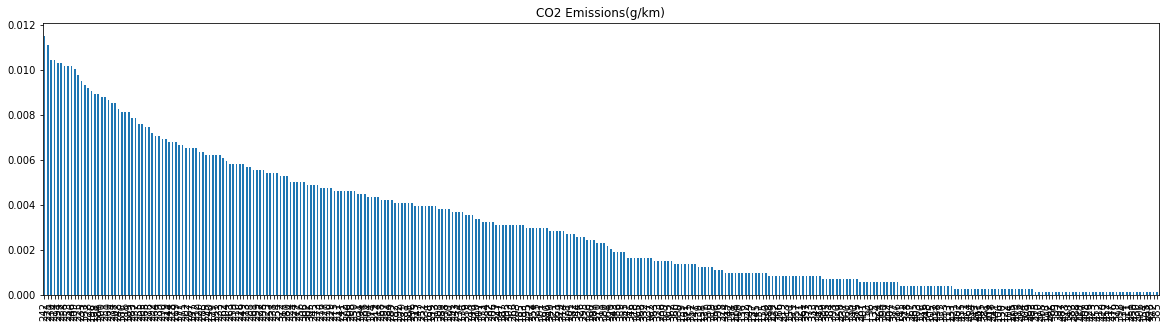

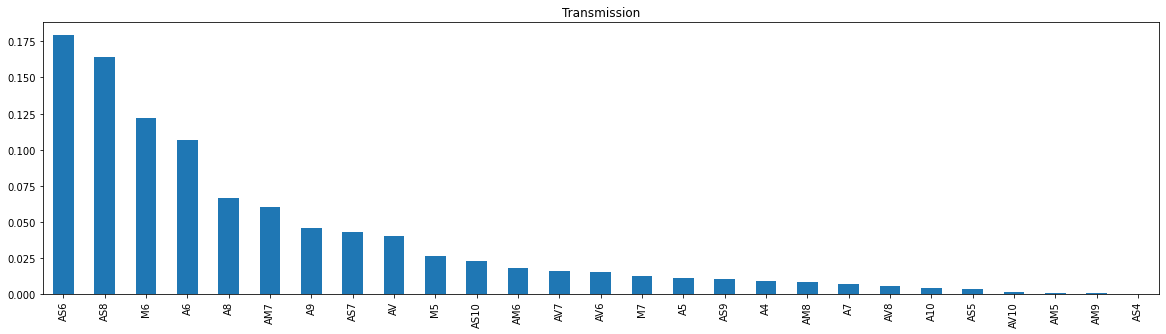

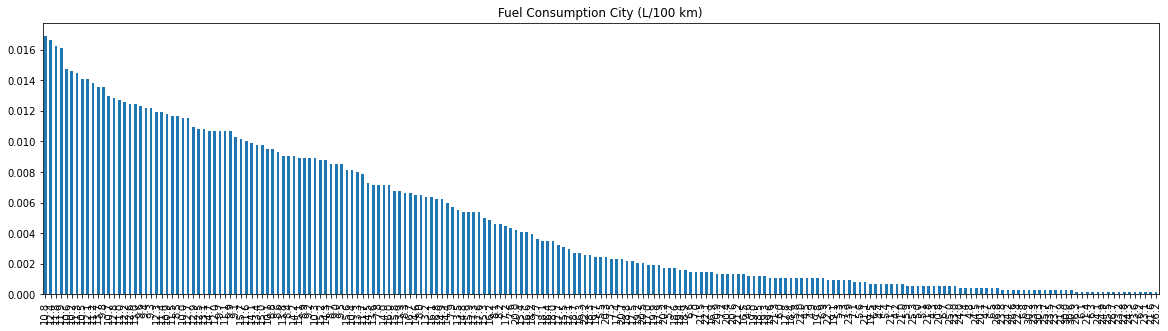

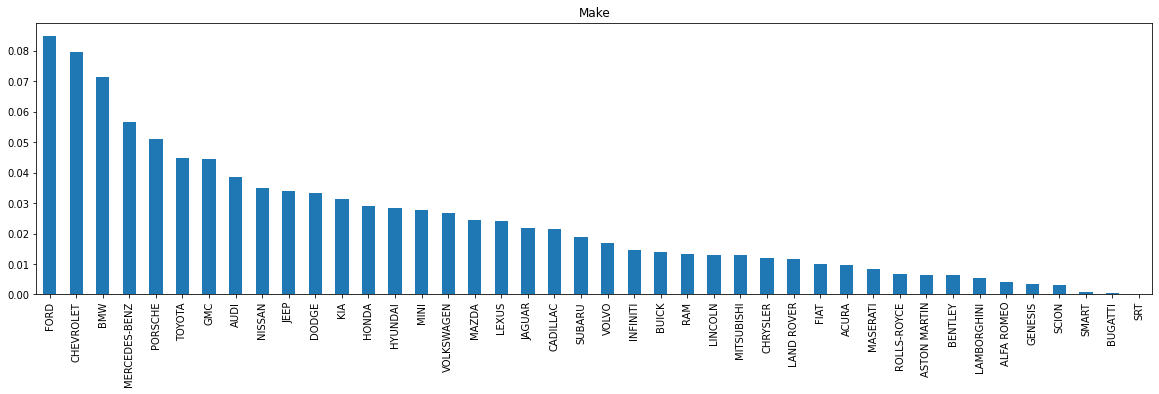

In [ ]:
for i in no_nulls:
  Plot_Graph(i, i)


some stastical data

In [ ]:
def count_freq_for_each(column_name):
    '''
    INPUT - column_name - string - the name of the column you would like to know about
    
    OUTPUT - result - string - the count pf indivisual in the column
    '''
    result = (df[column_name].value_counts())
    return result

In [ ]:
for i in no_nulls:
  print(count_freq_for_each(i))

7.8     209
8.5     184
8.7     169
8.3     168
8.4     162
9.6     154
7.7     152
9.2     151
7.0     150
9.0     146
7.9     143
8.6     141
8.2     140
9.8     138
7.6     136
8.0     135
7.4     134
8.1     131
7.2     130
9.3     128
9.4     127
7.5     124
7.3     124
6.9     122
8.9     120
9.1     120
10.2    117
6.6     115
9.5     114
8.8     110
10.4    109
6.8     107
7.1     106
9.7     104
10.3    104
6.4     103
9.9      96
10.7     95
6.7      90
6.5      89
6.2      84
11.2     79
6.3      78
10.9     76
10.1     75
10.8     74
10.0     72
5.9      71
10.6     68
11.4     67
6.0      59
6.1      55
11.7     54
10.5     54
11.0     51
11.5     50
11.3     50
11.1     49
11.8     42
5.8      41
12.9     39
12.6     37
12.0     37
13.0     33
11.6     33
11.9     32
5.7      32
12.7     28
13.9     27
12.3     27
14.3     26
12.4     26
12.8     26
12.2     24
12.1     23
5.5      22
13.1     21
5.6      20
12.5     20
13.6     19
14.2     19
14.0     19
13.8     17
5.1 

possible values in the column

In [ ]:
def possible_values_in_column(column_name,limit=8000):
    '''
    INPUT - column_name - string - the name of the column you would like to know about
    
    OUTPUT - result - list - names of groups
    '''
    result = dict(df[column_name].value_counts())
    i= 1
    possible_vals = []
    for key, value in result.items() :
        possible_vals.append(str(key))
        i =i+1
        if i ==limit:
            break
    possible_vals.append('Other')
    return possible_vals

In [ ]:
for i in no_nulls:
  print(possible_values_in_column(i))

['7.8', '8.5', '8.7', '8.3', '8.4', '9.6', '7.7', '9.2', '7.0', '9.0', '7.9', '8.6', '8.2', '9.8', '7.6', '8.0', '7.4', '8.1', '7.2', '9.3', '9.4', '7.5', '7.3', '6.9', '8.9', '9.1', '10.2', '6.6', '9.5', '8.8', '10.4', '6.8', '7.1', '9.7', '10.3', '6.4', '9.9', '10.7', '6.7', '6.5', '6.2', '11.2', '6.3', '10.9', '10.1', '10.8', '10.0', '5.9', '10.6', '11.4', '6.0', '6.1', '11.7', '10.5', '11.0', '11.5', '11.3', '11.1', '11.8', '5.8', '12.9', '12.6', '12.0', '13.0', '11.6', '11.9', '5.7', '12.7', '13.9', '12.3', '14.3', '12.4', '12.8', '12.2', '12.1', '5.5', '13.1', '5.6', '12.5', '13.6', '14.2', '14.0', '13.8', '5.1', '13.3', '14.5', '14.1', '13.4', '13.2', '14.4', '5.3', '14.9', '15.1', '13.5', '4.9', '16.6', '5.2', '14.6', '15.0', '15.3', '13.7', '15.2', '5.0', '15.6', '4.8', '4.6', '20.5', '16.9', '14.7', '16.1', '18.5', '18.0', '14.8', '15.4', '4.0', '19.3', '15.7', '16.2', '15.5', '4.4', '16.5', '16.7', '17.8', '15.8', '4.5', '17.2', '16.8', '17.7', '18.8', '16.0', '20.4', '20.6'

making dataframe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf9a5cd990>,
      dtype=object)

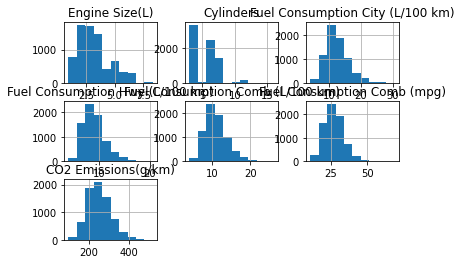

In [ ]:
df.hist()

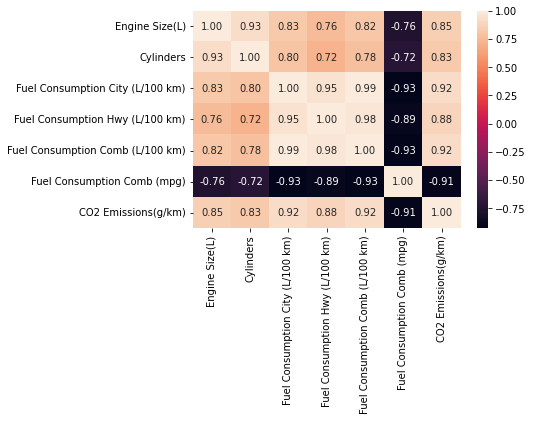

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");


categorical value

In [ ]:
cat_df = df.select_dtypes(include=['object']) # Subset to a dataframe only holding the categorical columns

# Print how many categorical columns are in the dataframe - should be 147
cat_df.shape[1]

5

In [ ]:
cat_cols_lst = cat_df.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [ ]:
cat_df = df.select_dtypes(include=['object']) # Subset to a dataframe only holding the categorical columns

cat_df.shape[1]
cat_cols_lst = cat_df.columns
df = create_dummy_df(df, cat_cols_lst, dummy_na=False) #Use your newly created function


In [ ]:
df.head(5)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,0,0,0,...,0,0,0,0,0,0,0,0,0,1


fixing missing values

In [ ]:
fill_mean = lambda col: col.fillna(col.mean())


In [ ]:
df.apply(fill_mean,axis=0)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7381,2.0,4,11.2,8.3,9.9,29,232,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7382,2.0,4,11.7,8.6,10.3,27,240,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7383,2.0,4,11.2,8.3,9.9,29,232,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.to_csv('allfield.csv')

In [ ]:
num_vars = df.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df[col].fillna((df[col].mean()), inplace=True)

In [ ]:
y = df['CO2 Emissions(g/km)']


In [ ]:
x = df.drop(columns=['CO2 Emissions(g/km)'])

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [ ]:
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(normalize=False)

In [ ]:
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

In [ ]:
r2_scores_test=(r2_score(y_test, y_test_preds))
r2_scores_train=(r2_score(y_train, y_train_preds))


print(r2_scores_train)
print("       ")
print(r2_scores_test)

0.9976663473359028
       
-4.48030601342729e+16


In [ ]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['CO2 Emissions(g/km)'], axis=0)
    y = df['CO2 Emissions(g/km)']
    
    #Drop respondent and expected salary columns
    df = df.drop(ls, axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)

NameError: ignored

In [ ]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

In [ ]:
cutoffs = [5000, 3500, 2500, 1000, 100, 50, 30, 25]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

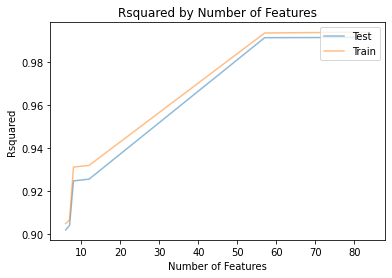

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(x, y, cutoffs)

In [ ]:
print(r2_scores_test)


[0.9017741136685834, 0.9039152546736585, 0.9246222001856165, 0.9254220826189764, 0.9913342507293241, 0.9914086514598849, 0.9914944640611589, 0.9915075426271569]


In [ ]:
print(r2_scores_train)

[0.9047176783082084, 0.9064892476504357, 0.9310476935259536, 0.9318352305856803, 0.9935194403474773, 0.993773136813458, 0.9938591626779022, 0.9938671204672005]


In [ ]:
print(lm_model)

LinearRegression(normalize=True)


save model using pickle

In [ ]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(lm_model, open(filename, 'wb'))



load saved model


In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9915075426271569


In [ ]:
pre = loaded_model.predict(X_test)

In [ ]:
print(loaded_model.predict(X_test.iloc[[0]]) )
print(y_test.iloc[[0]])

[254.20893075]
7261    253
Name: CO2 Emissions(g/km), dtype: int64


login and adress search from appsync

distance calculator

In [ ]:
pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 985 kB 5.2 MB/s 
     |████████████████████████████████| 140 kB 56.8 MB/s 
     |████████████████████████████████| 358 kB 34.3 MB/s 
     |████████████████████████████████| 58 kB 5.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [ ]:
from bs4 import BeautifulSoup
import requests, lxml

# https://docs.python-requests.org/en/master/user/quickstart/#passing-parameters-in-urls
params = {
    "q": "distance between zip 560059 banglore and zip 560059 India",
    "hl": "en",
    }

# https://docs.python-requests.org/en/master/user/quickstart/#custom-headers
# https://www.whatismybrowser.com/detect/what-is-my-user-agent
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4758.87 Safari/537.36",
    }

html = requests.get("https://www.google.com/search", params=params, headers=headers, timeout=30)
soup = BeautifulSoup(html.text, "lxml")

for result in soup.select(".uE1RRc"):
    print(result.text)

4 5
5 4
